# Introduction

Insomnia is one of the sleeping disorder. Although we may think that insomnia can occur only on adults, in fact it also can occur on adolescents. This data science project is delving into the insomnia during the adolescent period by using a dataset which contains the records of more than 90 adolecents. Individually, all participants have been following and participating in 19 questionnaires related to the sleep pattern, sleep habit, psychological issues, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")

# Library for Imputation
from sklearn.impute import SimpleImputer

# Library for Mutual Information
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(r"../datasets/insomnia_data.csv")


# Stage 1: Data Cleaning

Based on the observations toward the dataset, it requires some data cleaning steps before the dataset is processed on the next stages. On the following code, we can see the dimension and the first five rows of the dataset.

In [3]:
df.shape

(95, 174)

In [4]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total
0,sub_001,0,0,0,0,19.3,0,0,0,0,...,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806
1,sub_002,0,0,0,0,19.3,0,0,0,0,...,1.545013,0.327833,1.078180,-0.552396,-0.302127,-0.114565,1.083087,-0.656051,0.538016,0.153943
2,sub_003,0,0,0,1,18.8,0,0,0,0,...,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473
3,sub_004,0,0,0,0,18.8,0,0,0,0,...,-1.824849,-1.559689,-0.612036,-0.552396,0.249836,-0.114565,0.596210,-0.116442,0.538016,0.224254
4,sub_005,1,2,0,1,19.6,0,0,0,0,...,-2.199279,-0.615928,-0.950080,0.588422,1.353763,0.196397,0.109334,0.153363,1.336632,0.857049


## Drop non-total features from 'Multiple Columns with Total' questionnaire type

In [5]:
# Create seven lists which contain the non-total features name that will be dropped
non_total_ASHS = ['ASHS_physiological', 'ASHS_cognitive', 'ASHS_emotional', 'ASHS_SleepEnvirnmont', 'ASHS_DaytimeSleep', 'ASHS_substances', 'ASHS_bedtimeRoutine', 'ASHS_sleepStability', 'ASHS_BedroomSharing']
non_total_GCTI = ['GCTI_anxiety', 'GCTI_reflection', 'GCTI_worries', 'GCTI_thoughts', 'GCTI_negativeAffect']
non_total_PSRS = ['PSRS_PrR', 'PSRS_RWO', 'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE']
non_total_TCQIR = ['TCQIR_Aggressive_supression', 'TCQIR_cognitive_distraction', 'TCQIR_reappraisal', 'TCQIR_behavtioral_distraction', 'TCQIR_social_avoidance', 'TCQIR_worry']
non_total_ASQ = ['asq_home', 'asq_school', 'asq_attendance', 'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure', 'asq_finance', 'asq_responsibility']
non_total_CASQ = ['casq_sleepy', 'casq_alert']
non_total_DERS = ['ders_nonaccpetance', 'ders_goals', 'ders_impulse', 'ders_awareness', 'ders_strategies', 'ders_clarity']

# Concatenate seven lists onto a new list
non_total_cols = np.concatenate((non_total_ASHS, 
                                 non_total_GCTI, 
                                 non_total_PSRS,
                                 non_total_TCQIR,
                                 non_total_ASQ,
                                 non_total_CASQ,
                                 non_total_DERS
                                 ))
print('Amount of non-total features: {}'.format(len(non_total_cols)))
print(non_total_cols)

Amount of non-total features: 43
['ASHS_physiological' 'ASHS_cognitive' 'ASHS_emotional'
 'ASHS_SleepEnvirnmont' 'ASHS_DaytimeSleep' 'ASHS_substances'
 'ASHS_bedtimeRoutine' 'ASHS_sleepStability' 'ASHS_BedroomSharing'
 'GCTI_anxiety' 'GCTI_reflection' 'GCTI_worries' 'GCTI_thoughts'
 'GCTI_negativeAffect' 'PSRS_PrR' 'PSRS_RWO' 'PSRS_RSC' 'PSRS_FRa'
 'PSRS_RSE' 'TCQIR_Aggressive_supression' 'TCQIR_cognitive_distraction'
 'TCQIR_reappraisal' 'TCQIR_behavtioral_distraction'
 'TCQIR_social_avoidance' 'TCQIR_worry' 'asq_home' 'asq_school'
 'asq_attendance' 'asq_romantic' 'asq_peer' 'asq_teacher' 'asq_future'
 'asq_leisure' 'asq_finance' 'asq_responsibility' 'casq_sleepy'
 'casq_alert' 'ders_nonaccpetance' 'ders_goals' 'ders_impulse'
 'ders_awareness' 'ders_strategies' 'ders_clarity']


In [6]:
# Drop non-total features from the dataframe
df.drop(non_total_cols, inplace=True, axis=1)

# Current dataframe dimension after non-total features dropping
print('Current dataframe dimension after non-total features dropping: {}'.format(df.shape))

Current dataframe dimension after non-total features dropping: (95, 131)


## Drop all features start with 'Z'

In [7]:
# Get all features name
cols_name = df.columns
# Initiate 'Z' letter
first_letter = 'Z'
# Get features name start with 'Z'
z_cols = [name for name in cols_name if name[0] == first_letter]
print("Amount of features name start with 'Z': {}".format(len(z_cols)))
print(z_cols)

Amount of features name start with 'Z': 78
['ZISI_total', 'ZPSQI_total', 'ZBDI_total', 'ZASHS_total', 'ZASHS_physiological', 'ZASHS_cognitive', 'ZASHS_emotional', 'ZASHS_SleepEnvirnmont', 'ZASHS_DaytimeSleep', 'ZASHS_substances', 'ZASHS_bedtimeRoutine', 'ZASHS_sleepStability', 'ZASHS_BedroomSharing', 'ZDBAS_total', 'ZFIRST_total', 'ZGCTI_total', 'ZGCTI_anxiety', 'ZGCTI_reflection', 'ZGCTI_worries', 'ZGCTI_thoughts', 'ZGCTI_negativeAffect', 'ZSTAI_Y_total', 'ZNEO_neuroticism', 'ZNEO_extraversion', 'ZNEO_openness', 'ZNEO_agreeableness', 'ZNEO_Conscientiousness', 'ZMEQr_total', 'ZPSRS_PrR', 'ZPSRS_RWO', 'ZPSRS_RSC', 'ZPSRS_FRa', 'ZPSRS_RSE', 'ZPSRS_total', 'ZPSS_total', 'ZTCQI_R_Total', 'ZTCQIR_Aggressive_supression', 'ZTCQIR_cognitive_distraction', 'ZTCQIR_reappraisal', 'ZTCQIR_behavtioral_distraction', 'ZTCQIR_social_avoidance', 'ZTCQIR_worry', 'ZACE_tot', 'Zasq_home', 'Zasq_school', 'Zasq_attendance', 'Zasq_romantic', 'Zasq_peer', 'Zasq_teacher', 'Zasq_future', 'Zasq_leisure', 'Zasq_fi

In [8]:
# Drop features name start with 'Z'
df.drop(z_cols, inplace=True, axis=1)

# Current dataframe dimension after dropping features name start with 'Z'
print("Current dataframe dimension after dropping features name start with 'Z': {}".format(df.shape))

Current dataframe dimension after dropping features name start with 'Z': (95, 53)


In [9]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_total,Unnamed: 95
0,sub_001,0,0,0,0,19.3,0,0,0,0,...,6,9,4,14,14,9,13,13,87,NaN
1,sub_002,0,0,0,0,19.3,0,0,0,0,...,5,5,4,8,8,15,9,14,81,NaN
2,sub_003,0,0,0,1,18.8,0,0,0,0,...,4,9,6,6,16,10,12,9,70,NaN
3,sub_004,0,0,0,0,18.8,0,0,0,0,...,4,8,4,7,13,6,5,9,82,NaN
4,sub_005,1,2,0,1,19.6,0,0,0,0,...,4,11,4,6,9,5,7,8,91,NaN


## Drop unnamed features

In [10]:
# Get unnamed features
unnamed_cols = [name for name in cols_name if "Unnamed" in name]
print("Amount of unnamed features: {}".format(len(unnamed_cols)))
print(unnamed_cols)

Amount of unnamed features: 1
['Unnamed: 95']


In [11]:
# Drop all unnamed features
df.drop(unnamed_cols, axis=1, inplace=True)
df.head(5)

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_total
0,sub_001,0,0,0,0,19.3,0,0,0,0,...,4,6,9,4,14,14,9,13,13,87
1,sub_002,0,0,0,0,19.3,0,0,0,0,...,5,5,5,4,8,8,15,9,14,81
2,sub_003,0,0,0,1,18.8,0,0,0,0,...,4,4,9,6,6,16,10,12,9,70
3,sub_004,0,0,0,0,18.8,0,0,0,0,...,4,4,8,4,7,13,6,5,9,82
4,sub_005,1,2,0,1,19.6,0,0,0,0,...,4,4,11,4,6,9,5,7,8,91


## Combine 'PDS_FEMALE' and 'PDS_MALE' features onto a new single feature

In [12]:
# df.drop() code to prevent 'ValueError: cannot insert PDS_score, already exists' error message
df = df.drop(columns=['PDS_score'], errors='ignore')

# Insert new 'PDS_score' feature after 'PDS_MALE' feature
df.insert(df.columns.get_loc('PDS_MALE') + 1, 
          'PDS_score', 
          df.apply(lambda row: row['PDS_MALE'] if row['PDS_MALE'] > 0 else (row['PDS_FEMALE'] if row['PDS_FEMALE'] > 0 else None), axis=1))

# Drop 'PDS_FEMALE' and 'PDS_MALE' features
df = df.drop(columns=['PDS_FEMALE', 'PDS_MALE'], errors='ignore')

# Display the first feature until 'PDS_score' feature
df_partition = df.loc[:, :'PDS_score']
df_partition.head(5)

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_score
0,sub_001,0,0,0,0,19.3,0,0,0,0,1,0,0,1,0,16.0
1,sub_002,0,0,0,0,19.3,0,0,0,0,1,0,0,1,0,13.0
2,sub_003,0,0,0,1,18.8,0,0,0,0,1,0,0,1,0,16.0
3,sub_004,0,0,0,0,18.8,0,0,0,0,1,0,0,1,0,17.0
4,sub_005,1,2,0,1,19.6,0,0,0,0,1,0,0,1,0,14.0


## Drop the duplicated records (if those are available)

In [13]:
# Check on the duplicated rows
duplicated_rows = df[df.duplicated()]
print("Amount of the duplicated records: {}".format(duplicated_rows.shape[0]))

Amount of the duplicated records: 0


## Drop records when 'age' is greater than 19

In [14]:
# Check on the records with 'age' value is greater than 19
adults = df.loc[df.Age >= 20.0]
print("Amount of the participants with age more than 19: {}".format(adults.shape[0]))
adults

Amount of the participants with age more than 19: 1


,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_total
7,sub_008,0,0,0,1,20.1,0,0,0,0,...,4,6,4,4,7,16,6,5,8,74


In [15]:
print("Original amount of the participants: {}".format(df.shape[0]))

# Drop the record of participant with age is more than 19
df = df.drop(df[df['Age'] >= 20.0].index)

print("Current amount of the participants: {}".format(df.shape[0]))

Original amount of the participants: 95
Current amount of the participants: 94


## Rename features

In [16]:
# Get the features name - before renaming process
old_cols_name = df.columns
old_cols_name

Index(['ID', 'Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'American_Indian',
       'Asian', 'Native_Hawaiian', 'Black', 'White', 'unknown_Race',
       'Hispanic', 'NotHispanic', 'unknown_Etnicity', 'PDS_score', 'ISI_total',
       'PSQI_total', 'BDI_total', 'ASHS_total', 'DBAS_total', 'FIRST_total',
       'GCTI_total', 'STAI_Y_total', 'NEO_neuroticism', 'NEO_extraversion',
       'NEO_openness', 'NEO_agreeableness', 'NEO_Conscientiousness',
       'MEQr_total', 'PSRS_total', 'PSS_total', 'TCQI_R_Total', 'ACE_tot',
       'casq_total', 'cope_disengage_su', 'cope_growth',
       'cope_disengage_mental', 'cope_emotions', 'cope_socialsupp_instr',
       'cope_active', 'cope_denial', 'cope_religion', 'cope_humor',
       'cope_disengage_emo', 'cope_restraint', 'cope_socialsupp_emo',
       'cope_acccept', 'cope_suppression', 'cope_planning', 'ders_total'],
      dtype='object')

In [17]:
# Create dictionary which contains the old and new features name
cols_new_name = {'unknown_Race': 'Unknown_Race',
                 'NotHispanic': 'Not_Hispanic',
                 'unknown_Etnicity': 'Unknown_Etnicity',
                 'PDS_score': 'PDS_Score',
                 'ISI_total': 'ISI_Total',
                 'PSQI_total': 'PSQI_Total',
                 'BDI_total': 'BDI_Total',
                 'ASHS_total': 'ASHS_Total',
                 'DBAS_total': 'DBAS_Total',
                 'FIRST_total': 'FIRST_Total',
                 'GCTI_total': 'GCTI_Total',
                 'STAI_Y_total': 'STAI_Y_Total',
                 'NEO_neuroticism': 'NEO_Neuroticism',
                 'NEO_extraversion': 'NEO_Extraversion',
                 'NEO_openness': 'NEO_Openness',
                 'NEO_agreeableness': 'NEO_Agreeableness',
                 'MEQr_total': 'MEQr_Total',
                 'PSRS_total': 'PSRS_Total',
                 'PSS_total': 'PSS_Total',
                 'ACE_tot': 'ACE_Total',
                 'casq_total': 'CASQ_Total',
                 'cope_disengage_su': 'COPE_Substance_Use',
                 'cope_growth': 'COPE_Growth',
                 'cope_disengage_mental': 'COPE_Mental_Disengagement',
                 'cope_emotions': 'COPE_Emotions',
                 'cope_socialsupp_instr': 'COPE_Social_Support_Instrumental',
                 'cope_active': 'COPE_Active',
                 'cope_denial': 'COPE_Denial',
                 'cope_religion': 'COPE_Religion',
                 'cope_humor': 'COPE_Humor',
                 'cope_disengage_emo': 'COPE_Behavioral_Disengagement',
                 'cope_restraint': 'COPE_Restraint',
                 'cope_socialsupp_emo': 'COPE_Social_Support_Emotional',
                 'cope_acccept': 'COPE_Accceptance',
                 'cope_suppression': 'COPE_Suppression',
                 'cope_planning': 'COPE_Planning',
                 'ders_total': 'DERS_Total'        
}

# Rename the features based on a 'cols_new_name' dictionary
df.rename(columns=cols_new_name, inplace=True)

# Get the features name - after renaming process
current_cols_name = df.columns
current_cols_name

Index(['ID', 'Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'American_Indian',
       'Asian', 'Native_Hawaiian', 'Black', 'White', 'Unknown_Race',
       'Hispanic', 'Not_Hispanic', 'Unknown_Etnicity', 'PDS_Score',
       'ISI_Total', 'PSQI_Total', 'BDI_Total', 'ASHS_Total', 'DBAS_Total',
       'FIRST_Total', 'GCTI_Total', 'STAI_Y_Total', 'NEO_Neuroticism',
       'NEO_Extraversion', 'NEO_Openness', 'NEO_Agreeableness',
       'NEO_Conscientiousness', 'MEQr_Total', 'PSRS_Total', 'PSS_Total',
       'TCQI_R_Total', 'ACE_Total', 'CASQ_Total', 'COPE_Substance_Use',
       'COPE_Growth', 'COPE_Mental_Disengagement', 'COPE_Emotions',
       'COPE_Social_Support_Instrumental', 'COPE_Active', 'COPE_Denial',
       'COPE_Religion', 'COPE_Humor', 'COPE_Behavioral_Disengagement',
       'COPE_Restraint', 'COPE_Social_Support_Emotional', 'COPE_Accceptance',
       'COPE_Suppression', 'COPE_Planning', 'DERS_Total'],
      dtype='object')

In [18]:
# Count the amount of the changed features name
cols_differences = list(set(current_cols_name) - set(old_cols_name))
print("Amount of changed features name: {}".format(len(cols_differences)))

Amount of changed features name: 37


## Check and change the incorrect features datatype

In [19]:
original_dtypes = df.dtypes.tolist()
original_dtypes

[dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [20]:
object_cols = df.select_dtypes(include=['object'])
object_cols.columns

Index(['ID', 'DBAS_Total', 'COPE_Religion'], dtype='object')

In [21]:
# Check the availability of null data in the object type features
df[['DBAS_Total', 'COPE_Religion']].isnull().sum()

DBAS_Total       0
COPE_Religion    1
dtype: int64

In [22]:
# Change features with object datatype to float datatype by changing null data into NaN
df[['DBAS_Total', 'COPE_Religion']] = df[['DBAS_Total', 'COPE_Religion']].apply(pd.to_numeric, errors='coerce')

# Check the current availability of features with object datatype
current_object_cols = df.select_dtypes(include=['object'])
current_object_cols.columns

Index(['ID'], dtype='object')

## Count on missing data availability on Dataframe

In [23]:
# Check on amount of data with missing data availability
df.isnull().sum()

ID                                  0
Group                               0
SubGroup                            0
Remote                              0
Sex                                 0
Age                                 0
American_Indian                     0
Asian                               0
Native_Hawaiian                     0
Black                               0
White                               0
Unknown_Race                        0
Hispanic                            0
Not_Hispanic                        0
Unknown_Etnicity                    0
PDS_Score                           0
ISI_Total                           0
PSQI_Total                          0
BDI_Total                           0
ASHS_Total                          0
DBAS_Total                          1
FIRST_Total                         0
GCTI_Total                          0
STAI_Y_Total                        0
NEO_Neuroticism                     0
NEO_Extraversion                    0
NEO_Openness

In [24]:
# Get the features name with missing data availability
missing_data_cols = df.columns[df.isna().any()].tolist()
missing_data_cols

['DBAS_Total', 'ACE_Total', 'COPE_Substance_Use', 'COPE_Religion']

## Drop 'Group' features from the Dataframe

In [25]:
# Dataframe header before 'Group' feature dropping
df.head(5)

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,COPE_Denial,COPE_Religion,COPE_Humor,COPE_Behavioral_Disengagement,COPE_Restraint,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,DERS_Total
0,sub_001,0,0,0,0,19.3,0,0,0,0,...,4,6.0,9,4,14,14,9,13,13,87
1,sub_002,0,0,0,0,19.3,0,0,0,0,...,5,5.0,5,4,8,8,15,9,14,81
2,sub_003,0,0,0,1,18.8,0,0,0,0,...,4,4.0,9,6,6,16,10,12,9,70
3,sub_004,0,0,0,0,18.8,0,0,0,0,...,4,4.0,8,4,7,13,6,5,9,82
4,sub_005,1,2,0,1,19.6,0,0,0,0,...,4,4.0,11,4,6,9,5,7,8,91


In [26]:
# Drop 'Group' features from the Dataframe
df = df.drop(columns=['Group'], axis=1)

# Dataframe header after 'Group' feature dropping
df.head(5)

,ID,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,...,COPE_Denial,COPE_Religion,COPE_Humor,COPE_Behavioral_Disengagement,COPE_Restraint,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,DERS_Total
0,sub_001,0,0,0,19.3,0,0,0,0,1,...,4,6.0,9,4,14,14,9,13,13,87
1,sub_002,0,0,0,19.3,0,0,0,0,1,...,5,5.0,5,4,8,8,15,9,14,81
2,sub_003,0,0,1,18.8,0,0,0,0,1,...,4,4.0,9,6,6,16,10,12,9,70
3,sub_004,0,0,0,18.8,0,0,0,0,1,...,4,4.0,8,4,7,13,6,5,9,82
4,sub_005,2,0,1,19.6,0,0,0,0,1,...,4,4.0,11,4,6,9,5,7,8,91


## Create the flag features for the features with missing data

In [27]:
print("Amount of features before the flag features addition: {}".format(df.shape[1]))

Amount of features before the flag features addition: 50


In [28]:
# Create flag features in Dataframe
for column in df.columns[df.isna().any()]:
    df[f'{column}_flag'] = df[column].isna().astype(int)
    
print("Amount of features after the flag features addition: {}".format(df.shape[1]))
df.head(5)

Amount of features after the flag features addition: 54


,ID,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,...,COPE_Restraint,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,DERS_Total,DBAS_Total_flag,ACE_Total_flag,COPE_Substance_Use_flag,COPE_Religion_flag
0,sub_001,0,0,0,19.3,0,0,0,0,1,...,14,14,9,13,13,87,0,0,0,0
1,sub_002,0,0,0,19.3,0,0,0,0,1,...,8,8,15,9,14,81,0,0,0,0
2,sub_003,0,0,1,18.8,0,0,0,0,1,...,6,16,10,12,9,70,1,0,0,0
3,sub_004,0,0,0,18.8,0,0,0,0,1,...,7,13,6,5,9,82,0,0,0,0
4,sub_005,2,0,1,19.6,0,0,0,0,1,...,6,9,5,7,8,91,0,0,0,0


## Imputation for the missing data

In [29]:
# Define the imputer and the type of imputation - 'most frequent' equals to modus
imputer = SimpleImputer(strategy='most_frequent')

# Execute the imputation towards the feature with missing data
df[missing_data_cols] = imputer.fit_transform(df[missing_data_cols])

# Check the availability of missing data after the imputation
df[missing_data_cols].isna().sum()

# Convert Dataframe into CSV file
# df.to_csv('imputed_df.csv', sep=',', index=False, encoding='utf-8')    

DBAS_Total            0
ACE_Total             0
COPE_Substance_Use    0
COPE_Religion         0
dtype: int64

# Stage 2: Data Exploration

## Part 1: Feature Engineering

### Add average (mean) features for 'COPE' and 'NEO' questionnaires

In [30]:
# Get all COPE questionnaire features name
cope_columns_raw = [column for column in df.columns if 'COPE' in column]
cope_columns = [column for column in cope_columns_raw if 'flag' not in column]
print("All COPE features in Dataframe: {}".format(cope_columns))

All COPE features in Dataframe: ['COPE_Substance_Use', 'COPE_Growth', 'COPE_Mental_Disengagement', 'COPE_Emotions', 'COPE_Social_Support_Instrumental', 'COPE_Active', 'COPE_Denial', 'COPE_Religion', 'COPE_Humor', 'COPE_Behavioral_Disengagement', 'COPE_Restraint', 'COPE_Social_Support_Emotional', 'COPE_Accceptance', 'COPE_Suppression', 'COPE_Planning']


In [31]:
# Create the average (mean) feature of 'COPE' questionnaire
COPE_mean = df[cope_columns].mean(axis=1)
COPE_mean = COPE_mean.round(2)
# Place average (mean) feature of 'COPE' questionnaires after 'COPE_Planning feature position'
df.insert(loc = df.columns.get_loc('COPE_Planning') + 1, 
          column = 'COPE_mean', 
          value = COPE_mean)

In [32]:
df.loc[:, 'COPE_Substance_Use':'COPE_mean']

,COPE_Substance_Use,COPE_Growth,COPE_Mental_Disengagement,COPE_Emotions,COPE_Social_Support_Instrumental,COPE_Active,COPE_Denial,COPE_Religion,COPE_Humor,COPE_Behavioral_Disengagement,COPE_Restraint,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,COPE_mean
0,4.0,16,7,5,12,13,4,6.0,9,4,14,14,9,13,13,9.53
1,4.0,15,10,5,12,12,5,5.0,5,4,8,8,15,9,14,8.73
2,4.0,14,9,10,14,7,4,4.0,9,6,6,16,10,12,9,8.93
3,4.0,11,7,13,9,11,4,4.0,8,4,7,13,6,5,9,7.67
4,8.0,10,8,5,5,8,4,4.0,11,4,6,9,5,7,8,6.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4.0,8,8,7,9,10,4,4.0,9,6,8,4,7,8,9,7.00
91,4.0,12,11,9,11,12,5,4.0,16,8,13,8,12,8,12,9.67
92,6.0,13,8,6,7,12,5,7.0,16,6,7,6,13,8,13,8.87
93,4.0,16,7,10,10,12,4,9.0,4,4,7,10,16,9,15,9.13


In [33]:
# Get all NEO questionnaire features name
neo_columns_raw = [column for column in df.columns if 'NEO' in column]
neo_columns = [column for column in neo_columns_raw if 'flag' not in column]
print("All NEO features in Dataframe: {}".format(neo_columns))

All NEO features in Dataframe: ['NEO_Neuroticism', 'NEO_Extraversion', 'NEO_Openness', 'NEO_Agreeableness', 'NEO_Conscientiousness']


In [34]:
# Create the average (mean) feature of 'COPE' questionnaire
NEO_mean = df[neo_columns].mean(axis=1)
NEO_mean = NEO_mean.round(2)
# Place average (mean) feature of 'COPE' questionnaires after 'COPE_Planning feature position'
df.insert(loc = df.columns.get_loc('NEO_Conscientiousness') + 1, 
          column = 'NEO_mean', 
          value = NEO_mean)

In [35]:
df.loc[:, 'NEO_Neuroticism':'NEO_mean']

,NEO_Neuroticism,NEO_Extraversion,NEO_Openness,NEO_Agreeableness,NEO_Conscientiousness,NEO_mean
0,12,30,25,18,33,23.6
1,9,23,24,18,30,20.8
2,19,27,29,21,33,25.8
3,15,33,22,18,27,23.0
4,15,28,28,33,34,27.6
...,...,...,...,...,...,...
90,18,20,28,27,32,25.0
91,25,37,29,31,23,29.0
92,17,28,17,33,29,24.8
93,4,39,28,43,46,32.0


### Mutual Information

In [36]:
df.head()

,ID,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,...,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,COPE_mean,DERS_Total,DBAS_Total_flag,ACE_Total_flag,COPE_Substance_Use_flag,COPE_Religion_flag
0,sub_001,0,0,0,19.3,0,0,0,0,1,...,14,9,13,13,9.53,87,0,0,0,0
1,sub_002,0,0,0,19.3,0,0,0,0,1,...,8,15,9,14,8.73,81,0,0,0,0
2,sub_003,0,0,1,18.8,0,0,0,0,1,...,16,10,12,9,8.93,70,1,0,0,0
3,sub_004,0,0,0,18.8,0,0,0,0,1,...,13,6,5,9,7.67,82,0,0,0,0
4,sub_005,2,0,1,19.6,0,0,0,0,1,...,9,5,7,8,6.80,91,0,0,0,0


In [37]:
X = df.drop(columns=['ID'], errors='ignore')
X.head()

,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,Unknown_Race,...,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,COPE_mean,DERS_Total,DBAS_Total_flag,ACE_Total_flag,COPE_Substance_Use_flag,COPE_Religion_flag
0,0,0,0,19.3,0,0,0,0,1,0,...,14,9,13,13,9.53,87,0,0,0,0
1,0,0,0,19.3,0,0,0,0,1,0,...,8,15,9,14,8.73,81,0,0,0,0
2,0,0,1,18.8,0,0,0,0,1,0,...,16,10,12,9,8.93,70,1,0,0,0
3,0,0,0,18.8,0,0,0,0,1,0,...,13,6,5,9,7.67,82,0,0,0,0
4,2,0,1,19.6,0,0,0,0,1,0,...,9,5,7,8,6.80,91,0,0,0,0


In [38]:
y = X.pop("SubGroup")
y.head()

0    0
1    0
2    0
3    0
4    2
Name: SubGroup, dtype: int64

In [39]:
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

GCTI_Total                          0.389384
PSQI_Total                          0.380898
FIRST_Total                         0.373802
ISI_Total                           0.301273
COPE_Mental_Disengagement           0.155889
TCQI_R_Total                        0.139584
COPE_Denial                         0.086839
NEO_Agreeableness                   0.084499
COPE_Behavioral_Disengagement       0.082195
DBAS_Total                          0.079745
NEO_Conscientiousness               0.064779
STAI_Y_Total                        0.061067
PSRS_Total                          0.060748
BDI_Total                           0.057226
COPE_Social_Support_Instrumental    0.057102
NEO_Extraversion                    0.053754
DERS_Total                          0.052885
COPE_Social_Support_Emotional       0.040762
Age                                 0.031737
COPE_Substance_Use                  0.029461
Native_Hawaiian                     0.027500
CASQ_Total                          0.020828
COPE_Growt

In [40]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=1000, figsize=(10, 15))
plot_mi_scores(mi_scores)

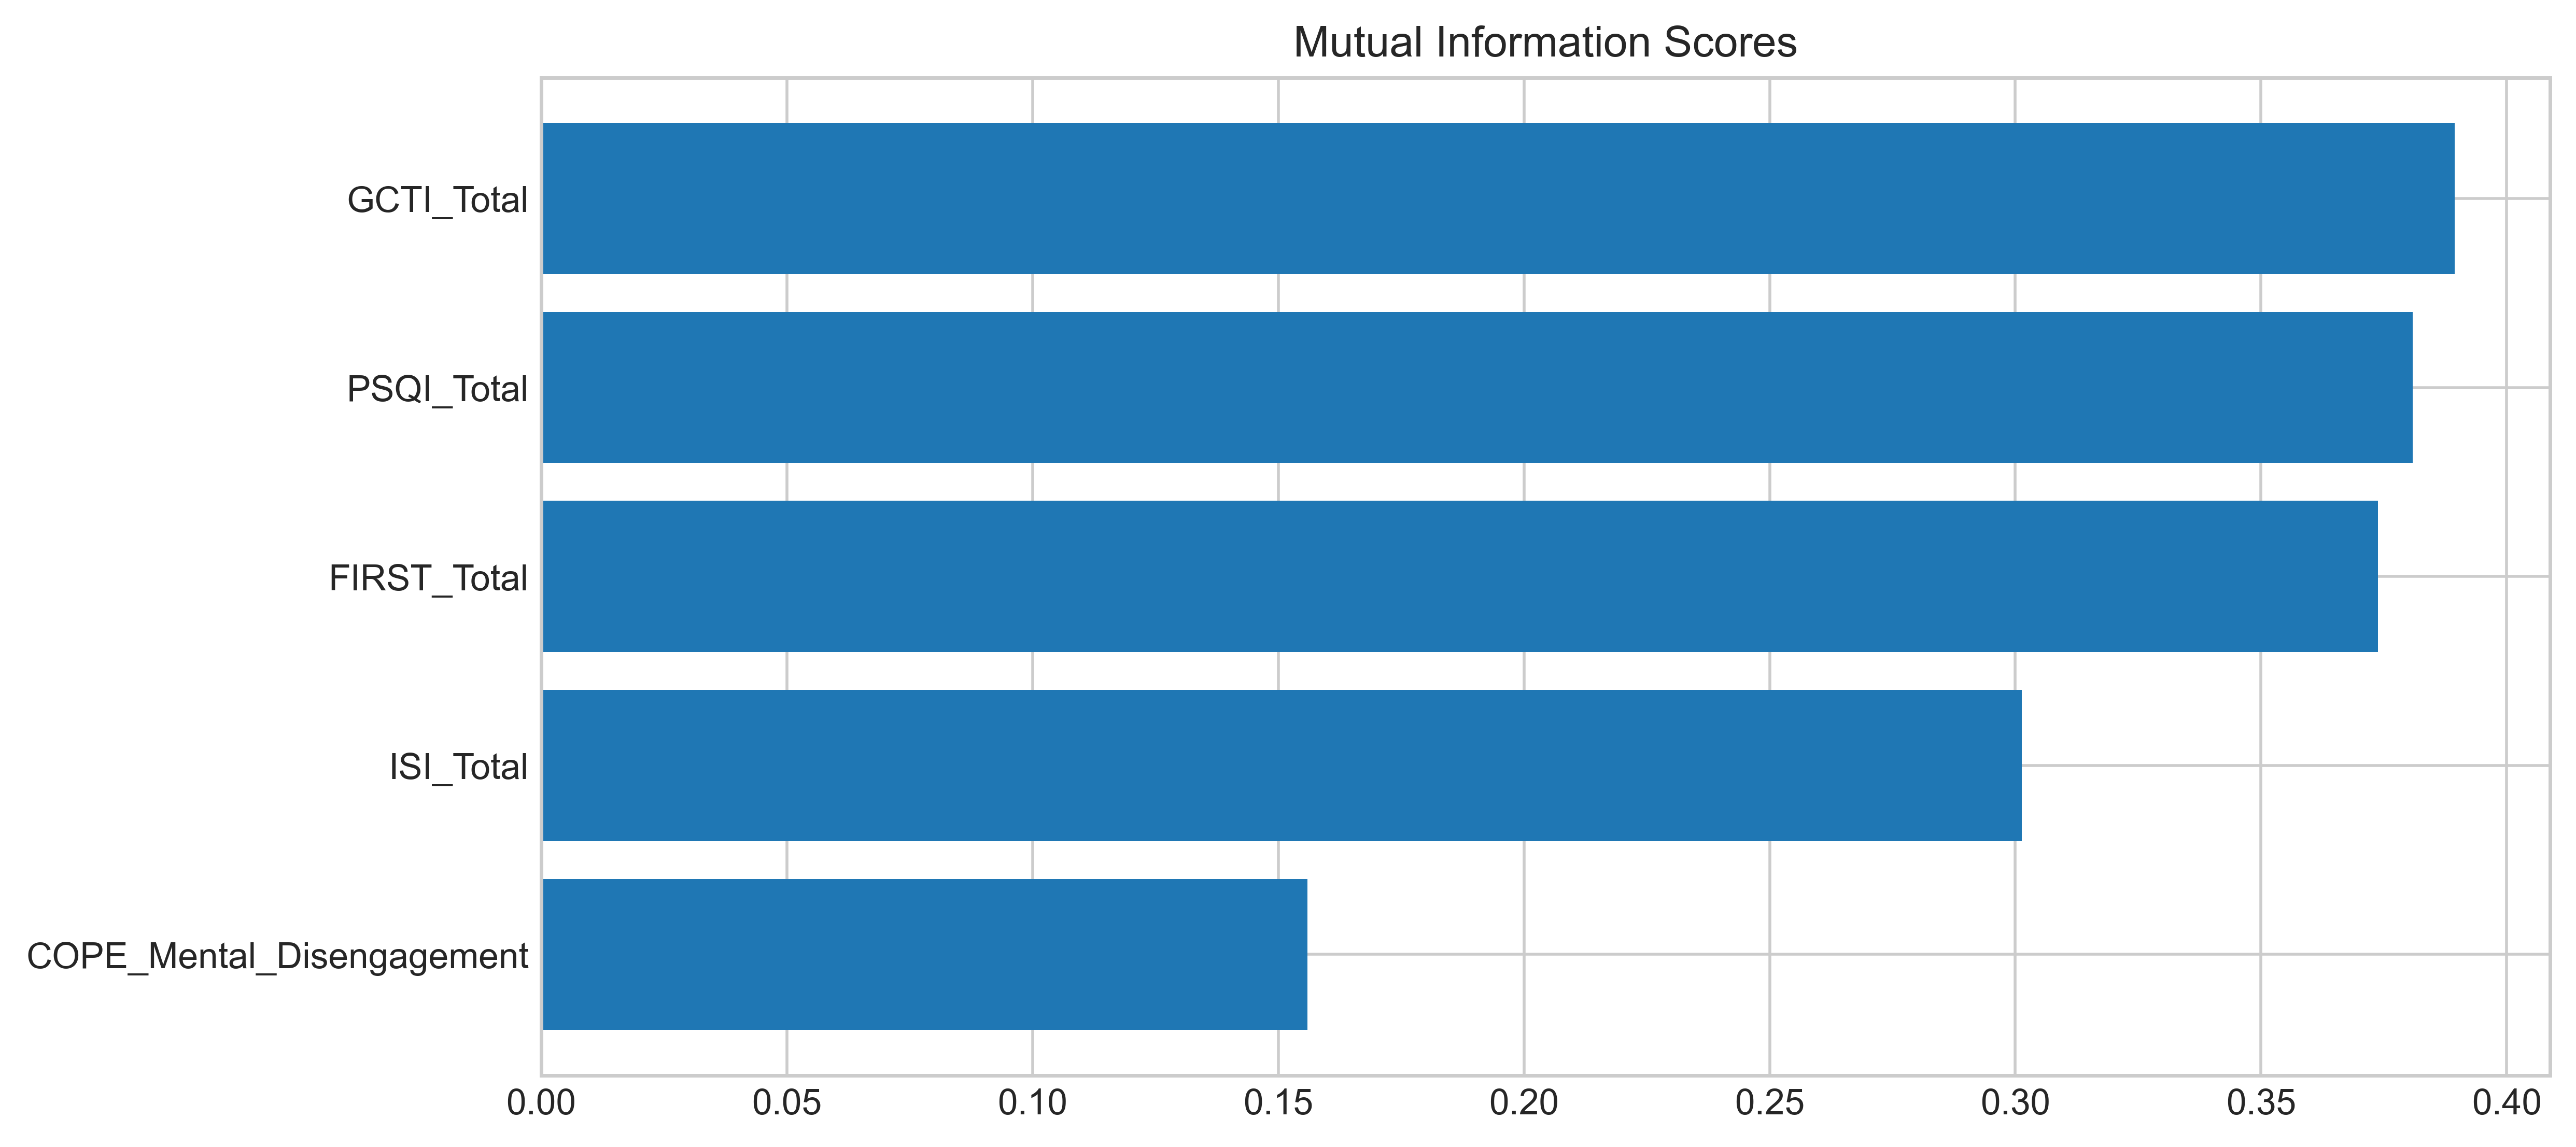

In [41]:
mi_scores[:5]
plt.figure(dpi=500, figsize=(10, 5))
plot_mi_scores(mi_scores[:5])

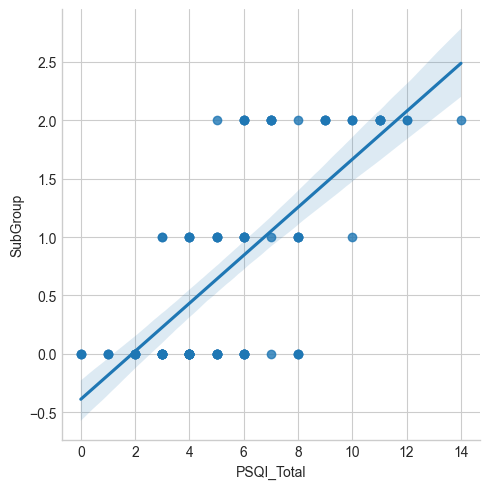

In [42]:
#sns.relplot(x="PSQI_Total", y="SubGroup", data=df);
sns.lmplot(x="PSQI_Total", y="SubGroup", data=df);

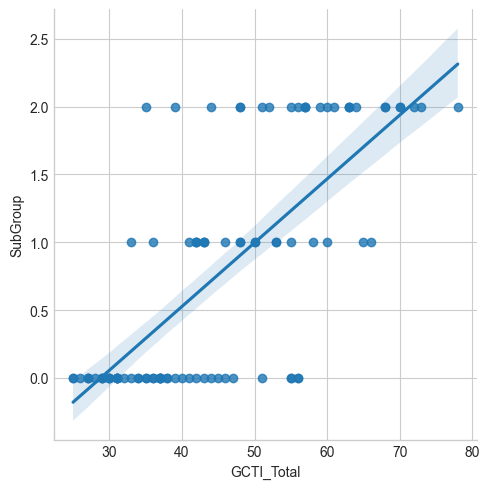

In [43]:
sns.lmplot(x="GCTI_Total", y="SubGroup", data=df);

## Part 2: Exploratory Data Analysis (EDA)

### Univariate Analysis

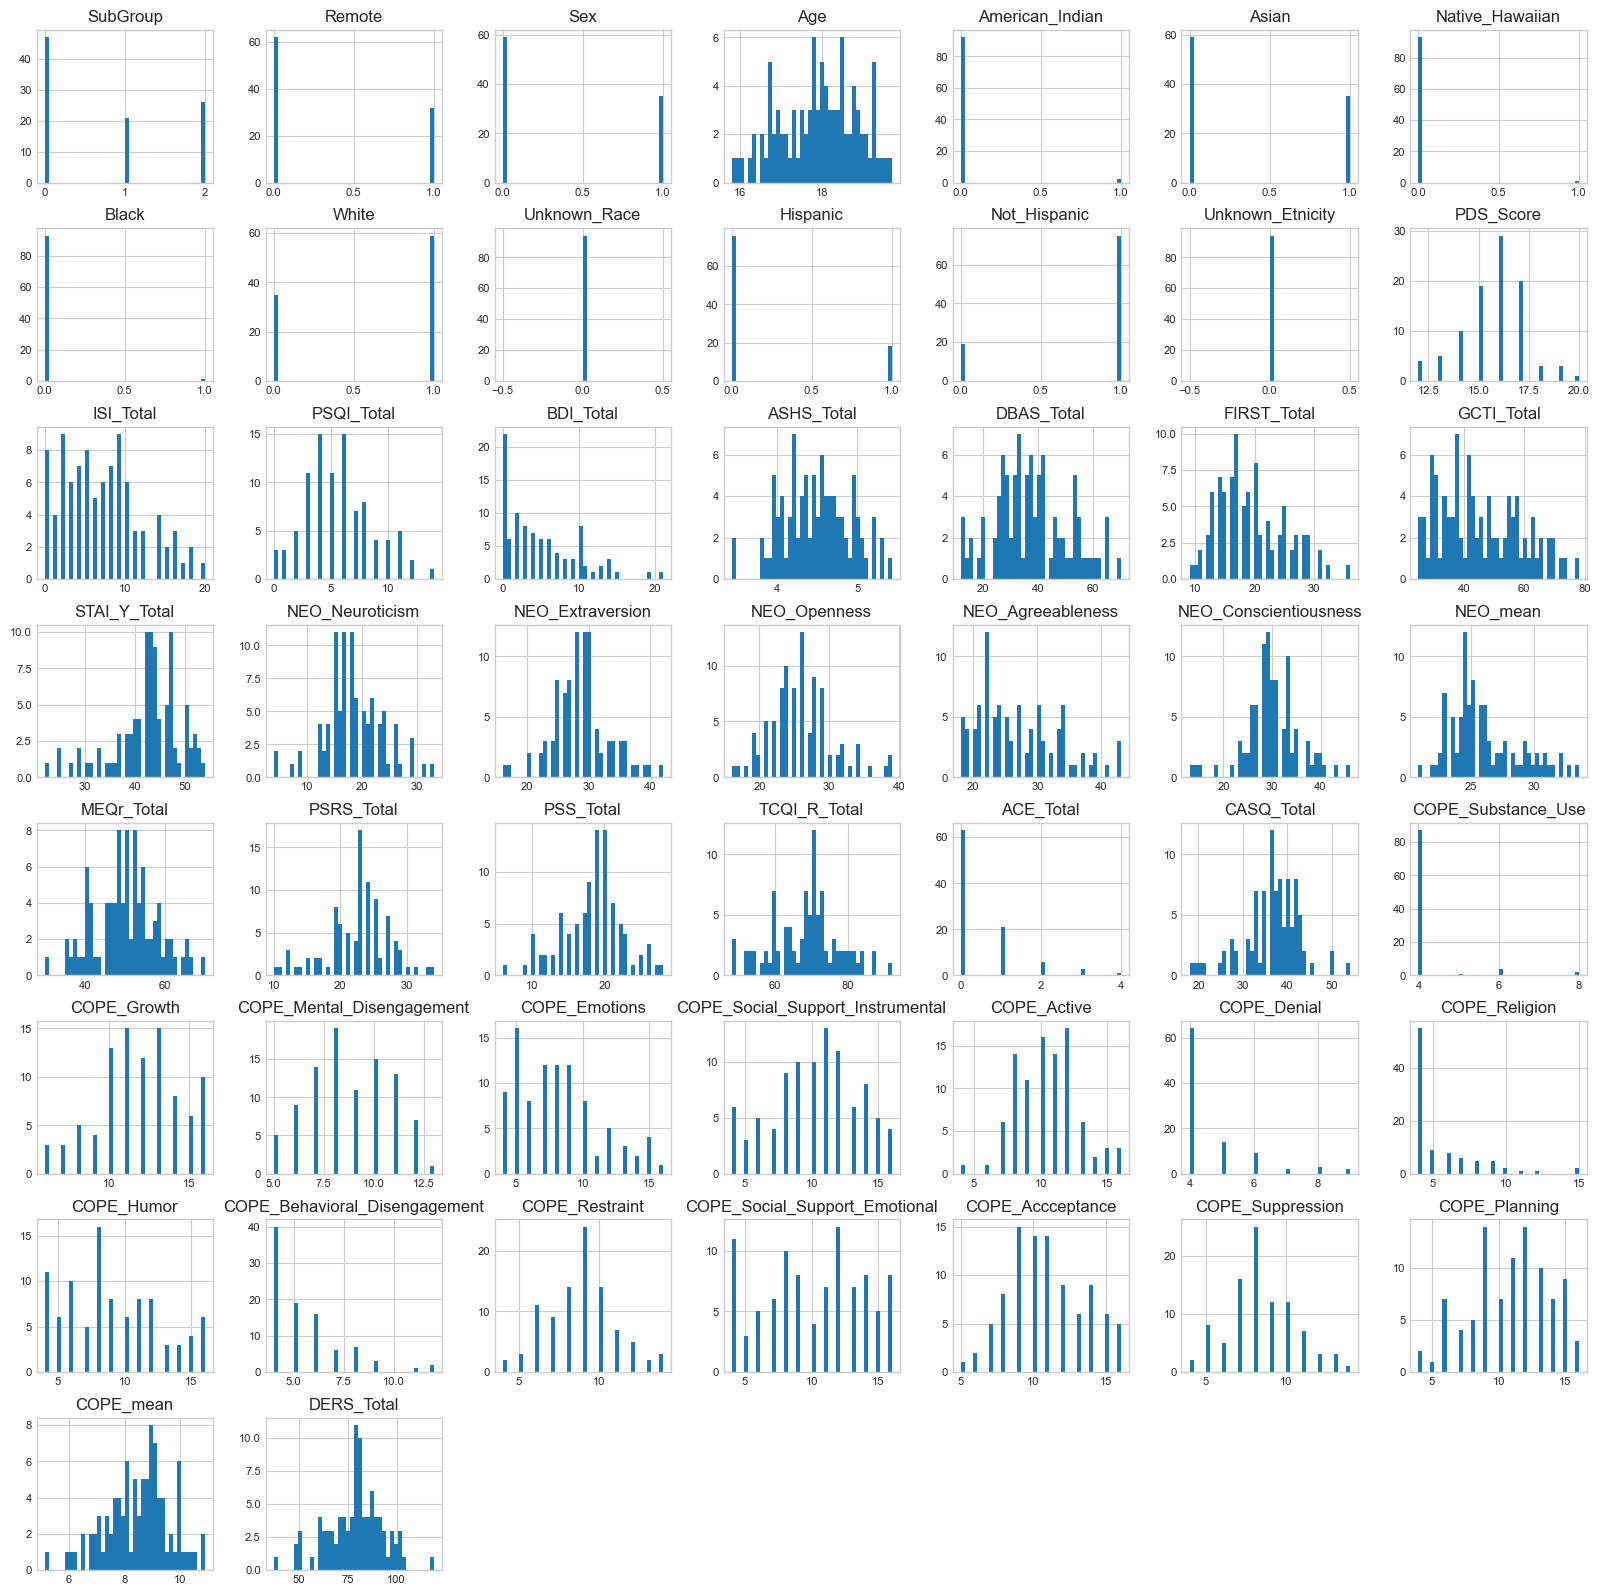

In [44]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(20, 20), bins=40, xlabelsize=8, ylabelsize=8);

#### The sex of participants distribution

In [78]:
sex_dist = df['Sex'].value_counts()
sex_df = sex_dist.to_frame(name="amount").reset_index()
sex_df['index'] = sex_df['index'].map({0:'Female', 1:'Male'})
sex_df.columns = ['sex', 'amount']
sex_df

,sex,amount
0,Female,59
1,Male,35


Text(0.5, 55, 'Female participant in this research is 64% more than male participant')

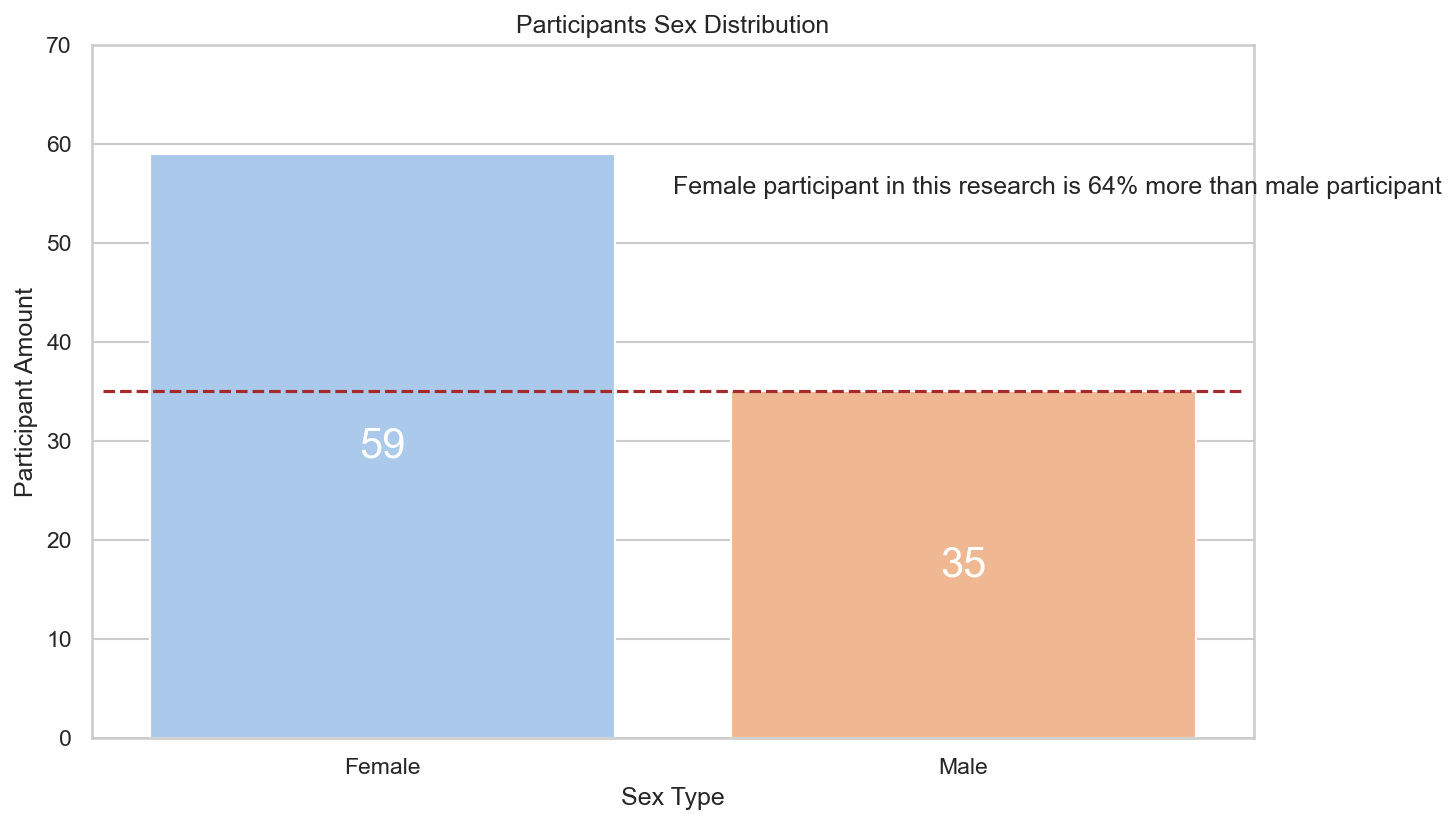

In [79]:
plt.figure(figsize=(10, 6), dpi=150)
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(data = sex_df, x = sex_df['sex'], y = sex_df['amount'])
ax.set_title("Participants Sex Distribution")
ax.set_xlabel("Sex Type")
ax.set_ylabel("Participant Amount")
ax.set_ylim(0,70)
ax.axhline(y = sex_df['amount'][1], 
           xmin = 0.01, 
           xmax = 0.99,
           color = "brown",
           linestyle = "dashed")
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height / 2,  # Y coordinate (tengah bar)
        '{:.0f}'.format(height),  # Text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        color='white',  # Text color
        fontsize=20  # Font size
)
ax.text(
    0.5, 55, "Female participant in this research is 64% more than male participant"
)

#### Severity of Insomnia Distribution

In [47]:
insomnia_severity = df['SubGroup'].value_counts()
severity_df = insomnia_severity.to_frame(name="amount").reset_index()
severity_df = severity_df.sort_values(by='index', ascending=True)
severity_df['index'] = severity_df['index'].map({0: 'Normal', 1: 'Subclinical', 2: 'Severe'})
severity_df

,index,amount
0,Normal,47
2,Subclinical,21
1,Severe,26


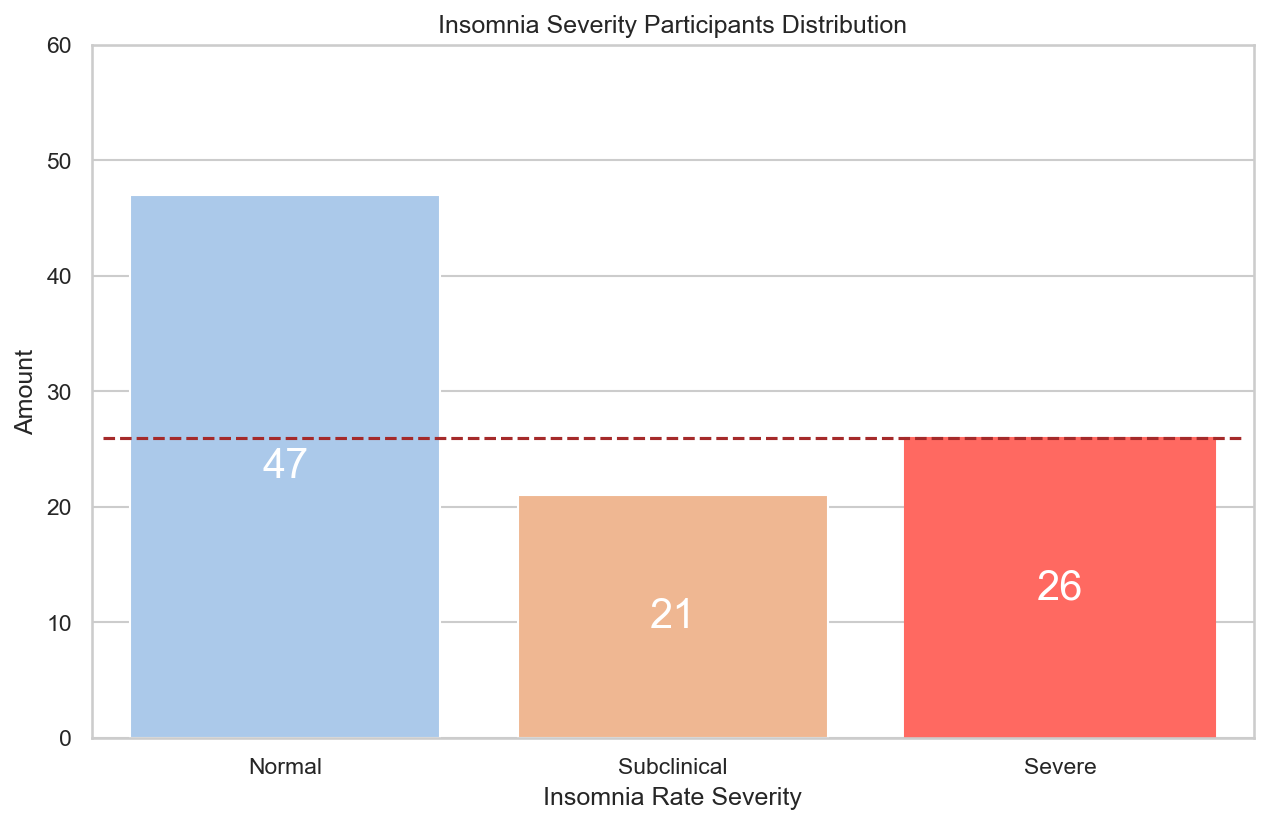

In [48]:
plt.figure(figsize=(10, 6), dpi=150)
ax = sns.barplot(data=severity_df, x=severity_df['index'], y=severity_df['amount'])
ax.set_title("Insomnia Severity Participants Distribution")
ax.set_xlabel('Insomnia Rate Severity')
ax.set_ylabel('Amount')
ax.patches[2].set_color("#ff6961")
ax.set_ylim(0,60)
ax.axhline(y = severity_df['amount'][1], 
           xmin = 0.01, 
           xmax = 0.99,
           color = "brown",
           linestyle = "dashed")
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height / 2,  # Y coordinate (tengah bar)
        '{:.0f}'.format(height),  # Text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        color='white',  # Text color
        fontsize=20  # Font size
)

#### Participants Distribution based on Race

In [49]:
races = df.loc[:, 'American_Indian':'White']

# Calculate the total of participant based on their races
races_df = races.sum().to_frame().reset_index()
races_df.columns = ['race', 'amount']
races_df = races_df.sort_values(by='amount', ascending=False)
races_df

,race,amount
4,White,59
1,Asian,35
0,American_Indian,2
2,Native_Hawaiian,1
3,Black,1


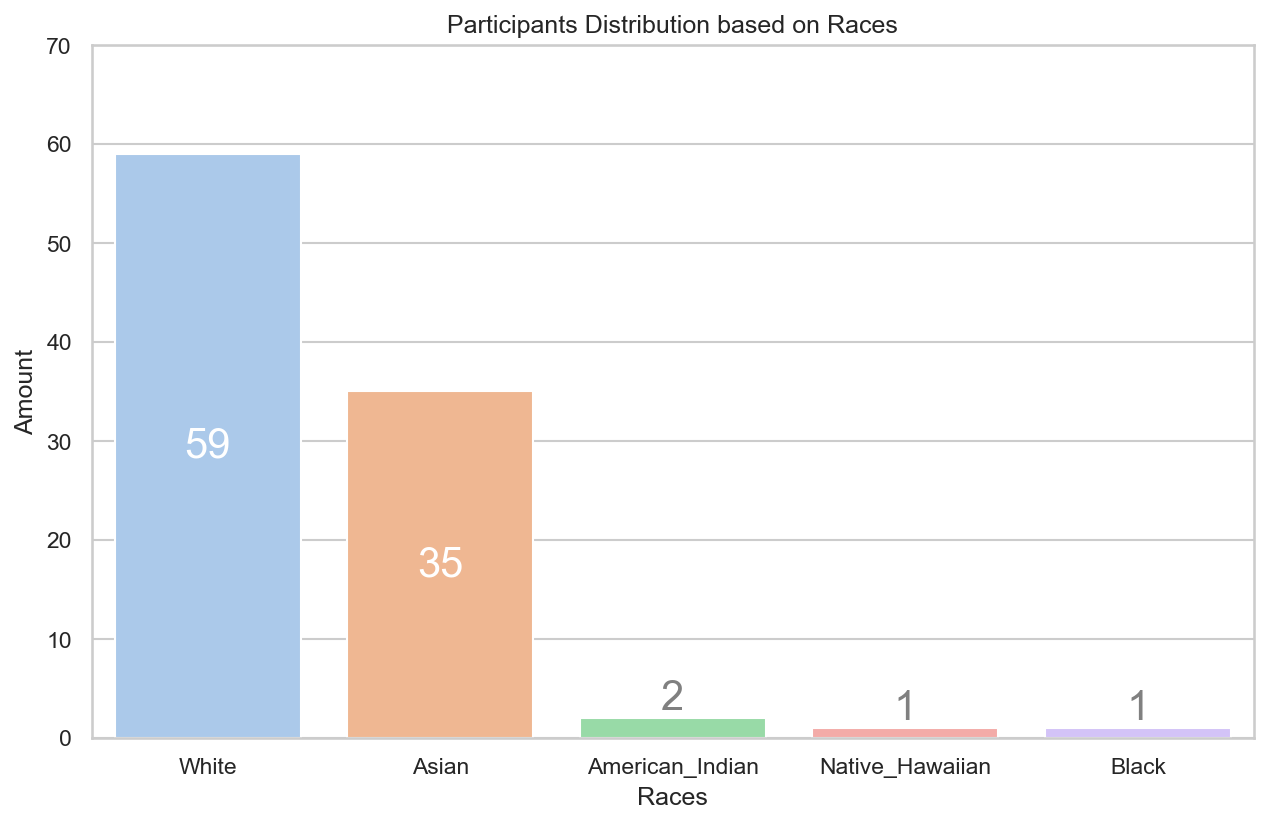

In [50]:
plt.figure(figsize=(10, 6), dpi=150)
ax = sns.barplot(data=races_df, x=races_df['race'], y=races_df['amount'])
ax.set_title("Participants Distribution based on Races")
ax.set_xlabel('Races')
ax.set_ylabel('Amount')
ax.set_ylim(0,70)
for p in ax.patches:
    height = p.get_height()
    if height >= 10:
        ax.text(
            p.get_x() + p.get_width() / 2,  # X coordinate
            height / 2,  # Y coordinate (tengah bar)
            '{:.0f}'.format(height),  # Text
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='white',  # Text color
            fontsize=20  # Font size
        )
    else:
        ax.text(
            p.get_x() + p.get_width() / 2,  # X coordinate
            height + 2,  # Y coordinate (tengah bar)
            '{:.0f}'.format(height),  # Text
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='gray',  # Text color
            fontsize=20  # Font size
        )

#### Analysis on Age and Insomnia Diagnosis Relationship

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 94
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                94 non-null     object 
 1   SubGroup                          94 non-null     int64  
 2   Remote                            94 non-null     int64  
 3   Sex                               94 non-null     int64  
 4   Age                               94 non-null     float64
 5   American_Indian                   94 non-null     int64  
 6   Asian                             94 non-null     int64  
 7   Native_Hawaiian                   94 non-null     int64  
 8   Black                             94 non-null     int64  
 9   White                             94 non-null     int64  
 10  Unknown_Race                      94 non-null     int64  
 11  Hispanic                          94 non-null     int64  
 12  Not_Hispan

In [52]:
df_age_rounded = df
df_age_rounded['Age'] = df_age_rounded['Age'].apply(lambda x: round(x))
severe_df = df_age_rounded[df_age_rounded['SubGroup'] == 2]
severe_df.head()
#df_age_rounded.head(20)

,ID,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,...,COPE_Social_Support_Emotional,COPE_Accceptance,COPE_Suppression,COPE_Planning,COPE_mean,DERS_Total,DBAS_Total_flag,ACE_Total_flag,COPE_Substance_Use_flag,COPE_Religion_flag
4,sub_005,2,0,1,20,0,0,0,0,1,...,9,5,7,8,6.80,91,0,0,0,0
11,sub_012,2,0,0,19,0,0,0,0,1,...,11,9,9,9,8.53,82,0,0,0,0
33,sub_034,2,0,0,18,0,1,0,0,1,...,14,8,7,7,7.87,102,0,0,0,0
34,sub_035,2,0,0,19,0,0,0,0,1,...,14,14,8,14,10.87,90,0,0,0,0
35,sub_036,2,0,0,19,0,0,0,0,1,...,13,11,10,12,8.80,103,0,1,0,0


In [53]:
age_df = df_age_rounded['Age'].value_counts().to_frame(name='amount').reset_index()
age_df.columns = ['age', 'amount']
age_df = age_df.sort_values(by='age', ascending=True)
age_df

,age,amount
3,16,8
2,17,20
0,18,41
1,19,22
4,20,3


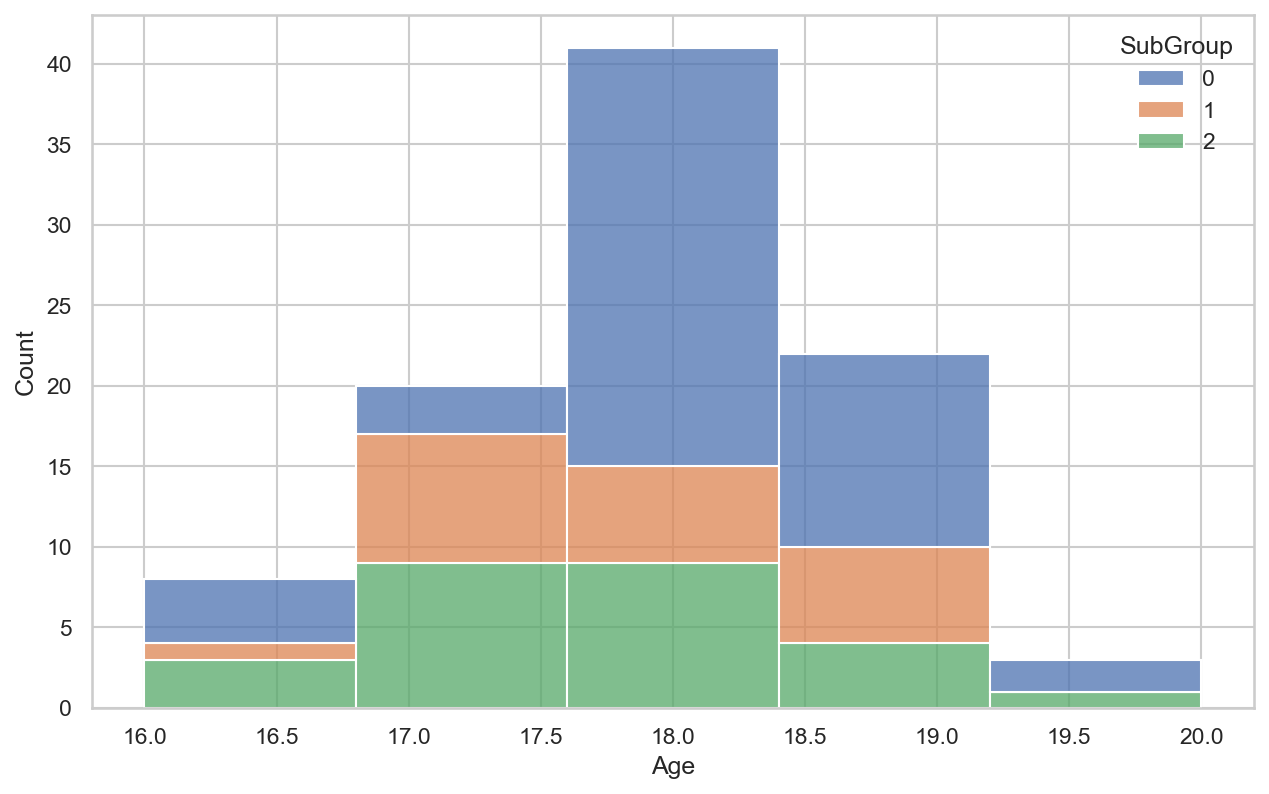

In [60]:
plt.figure(figsize=(10, 6), dpi=150)
ax = sns.histplot(data=df_age_rounded, x=df_age_rounded['Age'], hue=df_age_rounded['SubGroup'], multiple="stack", bins=5, palette="deep")

In [55]:
age_severe_df = severe_df.groupby('Age')['SubGroup'].count().to_frame(name="amount").reset_index()
age_severe_df.columns = ['age', 'amount']
age_severe_df

,age,amount
0,16,3
1,17,9
2,18,9
3,19,4
4,20,1


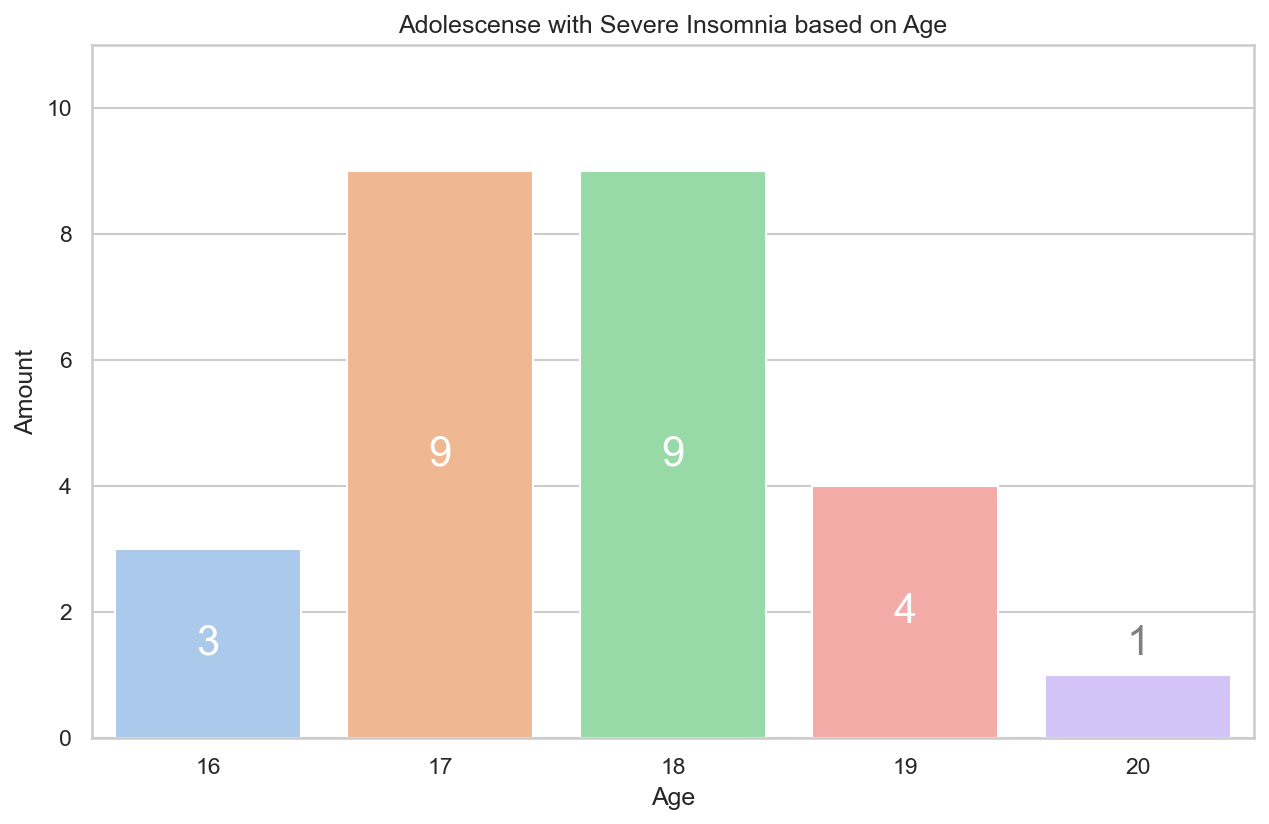

In [56]:
plt.figure(figsize=(10, 6), dpi=150)
ax = sns.barplot(data=age_severe_df, x=age_severe_df['age'], y=age_severe_df['amount'])
ax.set_title("Adolescense with Severe Insomnia based on Age")
ax.set_xlabel('Age')
ax.set_ylabel('Amount')
ax.set_ylim(0,11)
for p in ax.patches:
    height = p.get_height()
    if height >= 3:
        ax.text(
            p.get_x() + p.get_width() / 2,  # X coordinate
            height / 2,  # Y coordinate (tengah bar)
            '{:.0f}'.format(height),  # Text
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='white',  # Text color
            fontsize=20  # Font size
        )
    else:
        ax.text(
            p.get_x() + p.get_width() / 2,  # X coordinate
            height + 0.5,  # Y coordinate (tengah bar)
            '{:.0f}'.format(height),  # Text
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='gray',  # Text color
            fontsize=20  # Font size
        )

In [68]:
age_df_join = age_df
age_severe_df_join = age_severe_df
age_df_join.columns = ['age', 'participant_amount']
age_severe_df_join.columns = ['age', 'severe_amount']
age_percentage_df = pd.merge(age_df_join, age_severe_df_join, on='age')

# Add percentage of severe participants in each age
age_percentage_df['percentage'] = round((age_percentage_df['severe_amount']/age_percentage_df['participant_amount']*100), 1)
age_percentage_df

,age,participant_amount,severe_amount,percentage
0,16,8,3,37.5
1,17,20,9,45.0
2,18,41,9,22.0
3,19,22,4,18.2
4,20,3,1,33.3


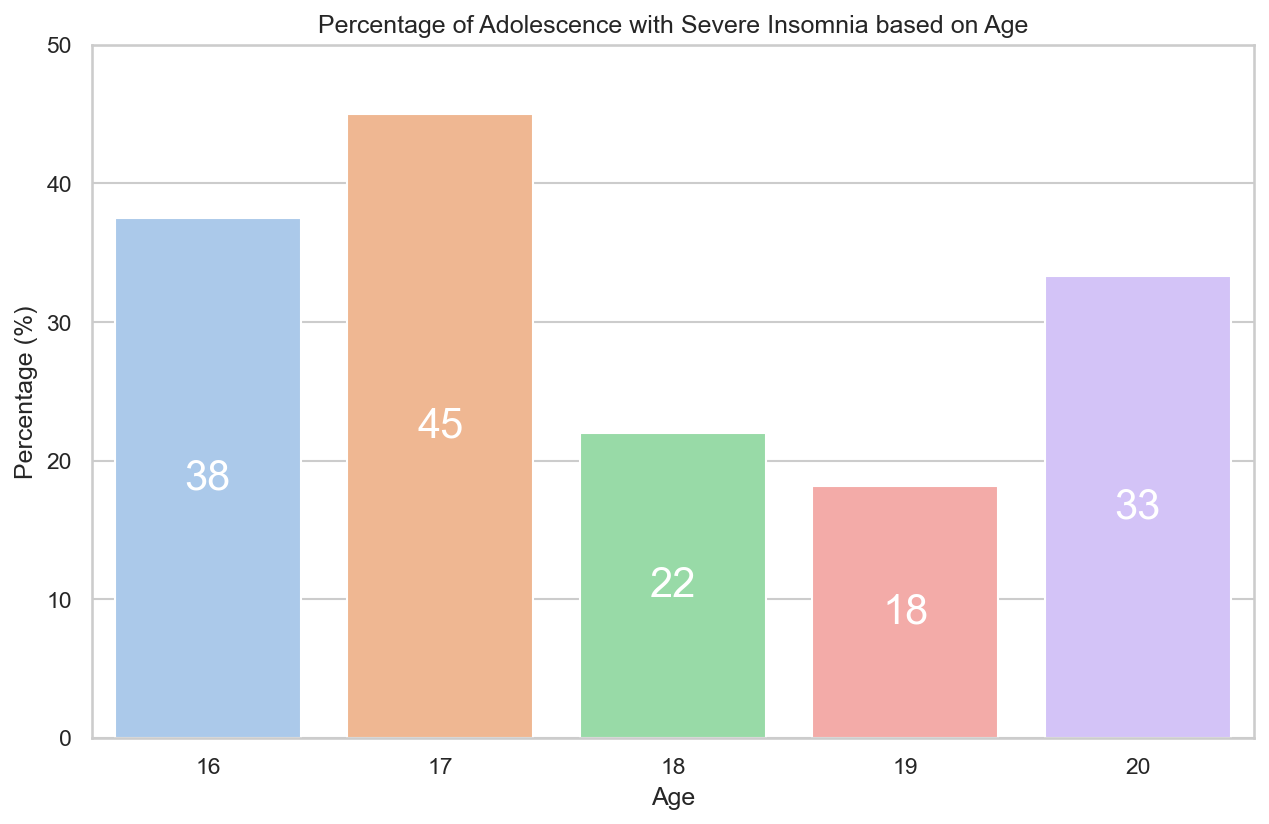

In [85]:
plt.figure(figsize=(10, 6), dpi=150)
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(data=age_percentage_df, x=age_percentage_df['age'], y=age_percentage_df['percentage'])
ax.set_title("Percentage of Adolescence with Severe Insomnia based on Age")
ax.set_xlabel('Age')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0,50)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height / 2,  # Y coordinate (tengah bar)
        '{:.0f}'.format(height),  # Text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        color='white',  # Text color
        fontsize=20  # Font size
    )

#### Analysis on Sex Type and Insomnia Diagnosis Relationship

In [84]:
sex_severe_df = severe_df.groupby('Sex')['SubGroup'].count().to_frame(name="severe_amount").reset_index()
sex_severe_df['Sex'] = sex_severe_df['Sex'].map({0:'Female', 1:'Male'})
sex_severe_df.rename(columns={'Sex': 'sex'}, inplace=True)

sex_percentage_df = pd.merge(sex_df, sex_severe_df, on='sex')
sex_percentage_df.rename(columns={'amount': 'participant_amount'}, inplace=True)
sex_percentage_df['percentage'] = round((sex_percentage_df['severe_amount']/sex_percentage_df['participant_amount']*100), 1)

# Add percentage column
sex_percentage_df

,sex,participant_amount,severe_amount,percentage
0,Female,59,20,33.9
1,Male,35,6,17.1


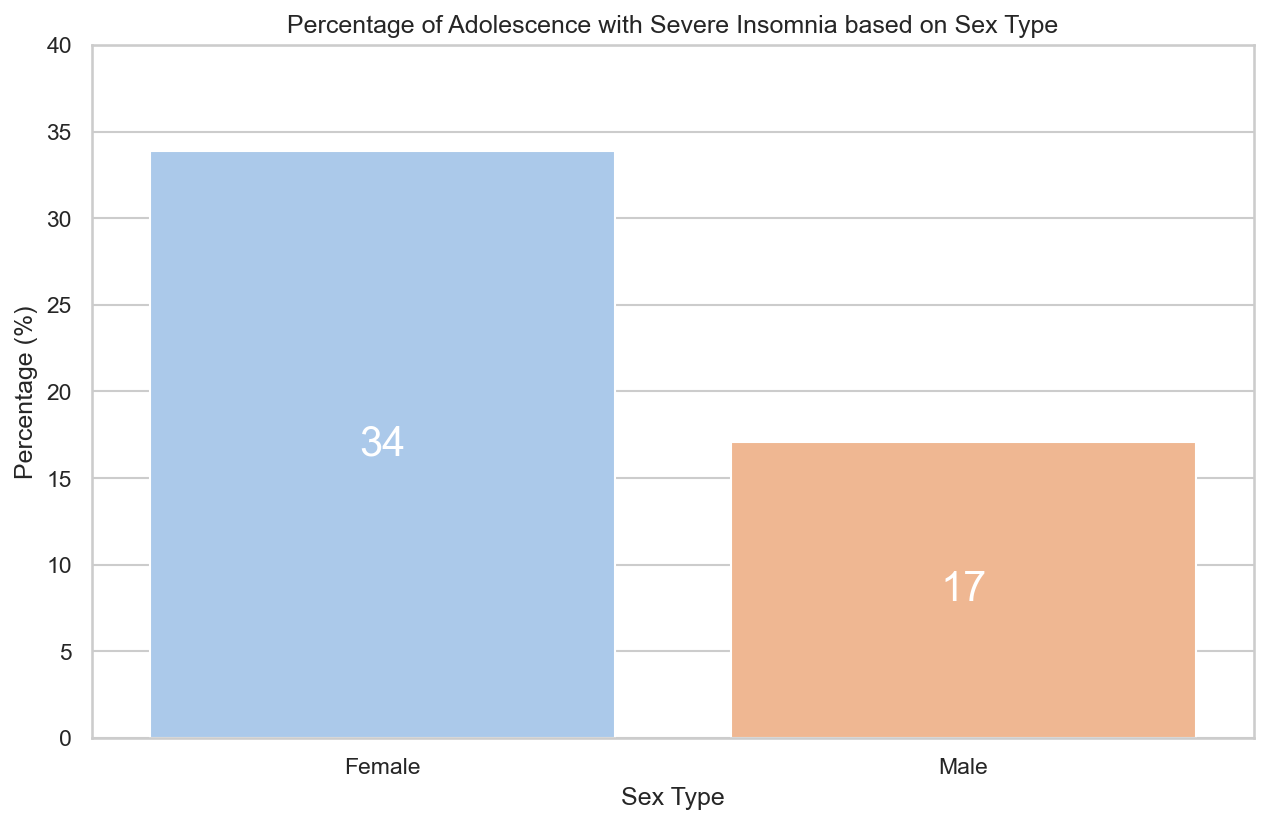

In [90]:
plt.figure(figsize=(10, 6), dpi=150)
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(data = sex_percentage_df, x = sex_percentage_df['sex'], y = sex_percentage_df['percentage'])
ax.set_title("Percentage of Adolescence with Severe Insomnia based on Sex Type")
ax.set_xlabel("Sex Type")
ax.set_ylabel("Percentage (%)")
ax.set_ylim(0,40)
#ax.axhline(y = sex_df['amount'][1], 
           #xmin = 0.01, 
           #xmax = 0.99,
           #color = "brown",
           #linestyle = "dashed")
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height / 2,  # Y coordinate (tengah bar)
        '{:.0f}'.format(height),  # Text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        color='white',  # Text color
        fontsize=20  # Font size
    )

#### Analysis on Insomnia Severity Index and Insomnia Diagnosis Relationship